Task 1: Exploratory Data Analysis (EDA):

In [1]:
# Load the dataset and perform basic data exploration
# load data
import pandas as pd
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# display basic information about the dataset
df.info()
df.describe()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


,0
Type,3
Alcohol,126
Malic,133
Ash,79
Alcalinity,63
Magnesium,53
Phenols,97
Flavanoids,132
Nonflavanoids,39
Proanthocyanins,101


Generate histograms, boxplots, and density plots to visualize the distribution of features.


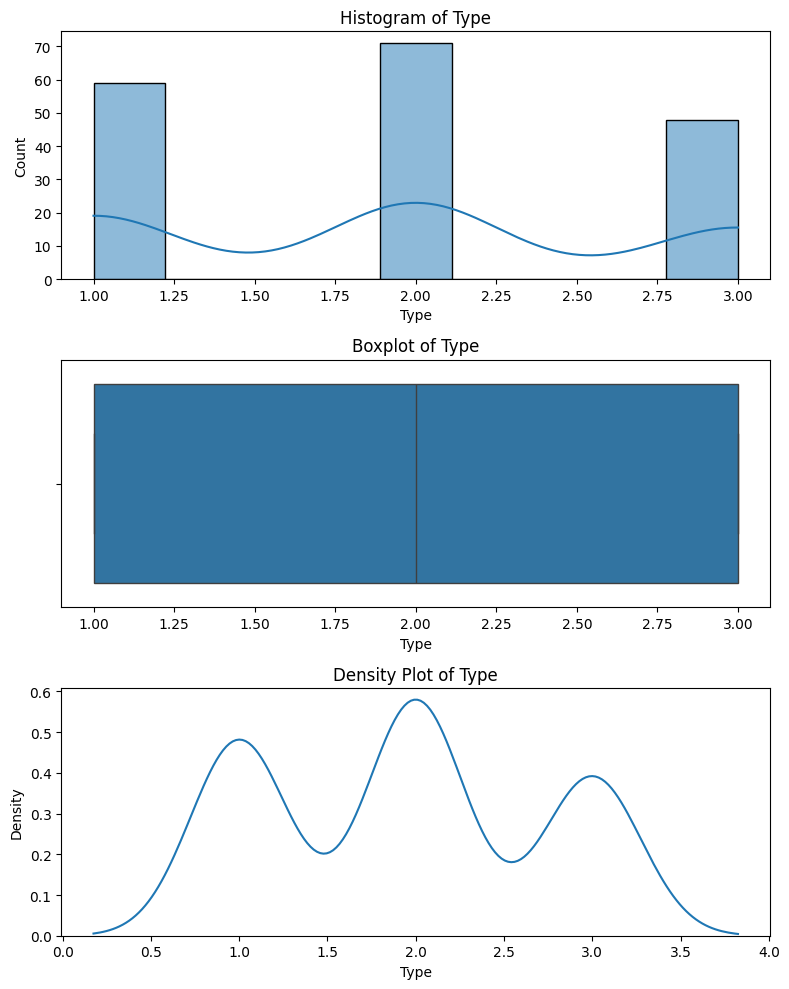

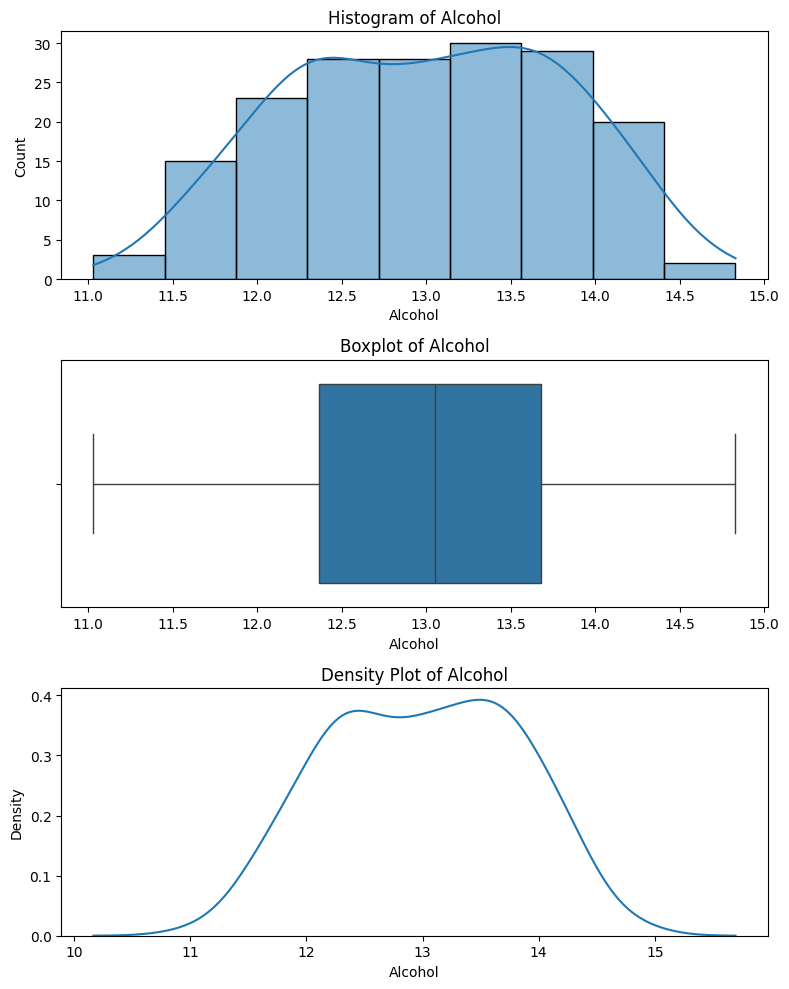

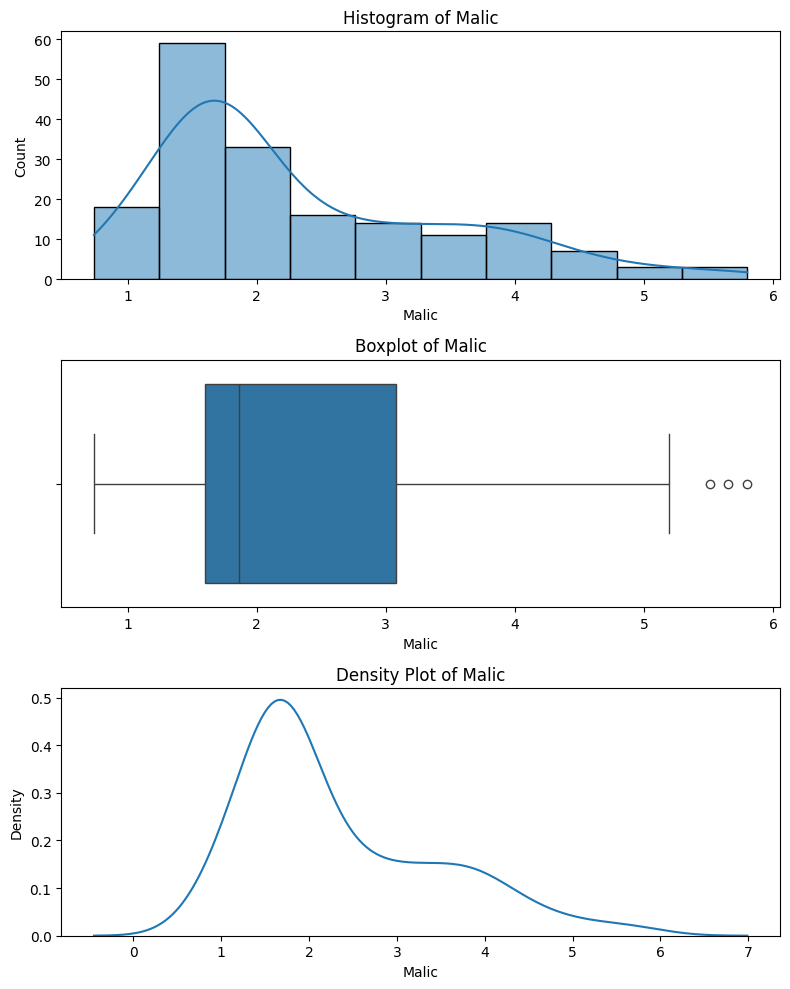

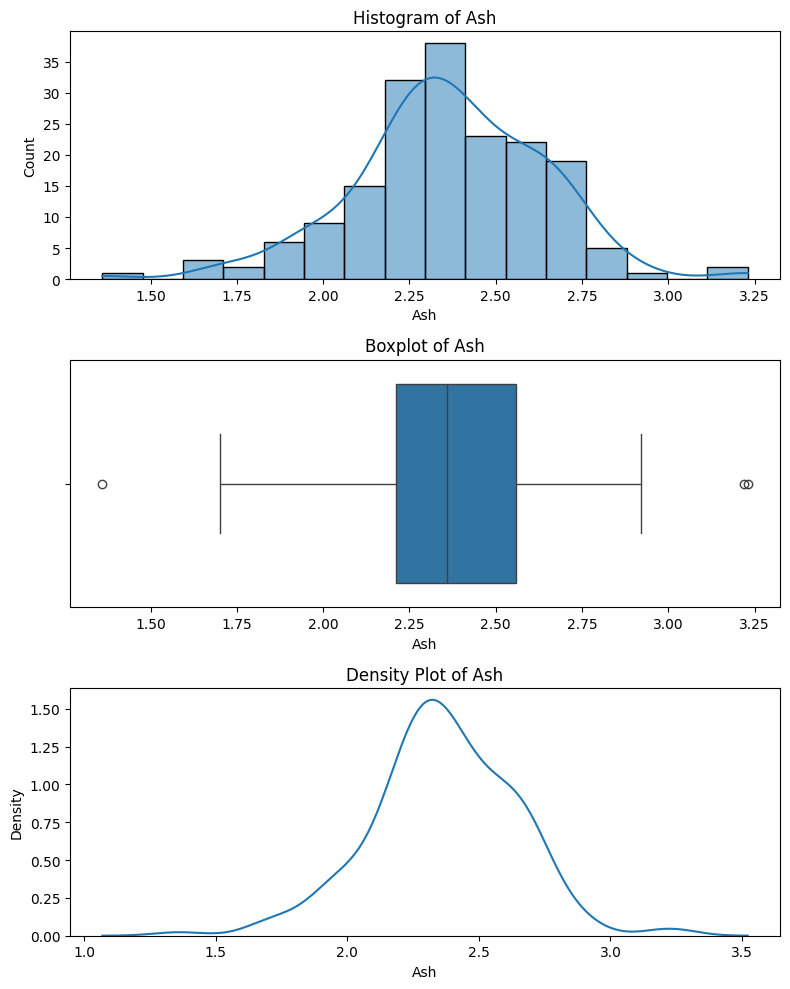

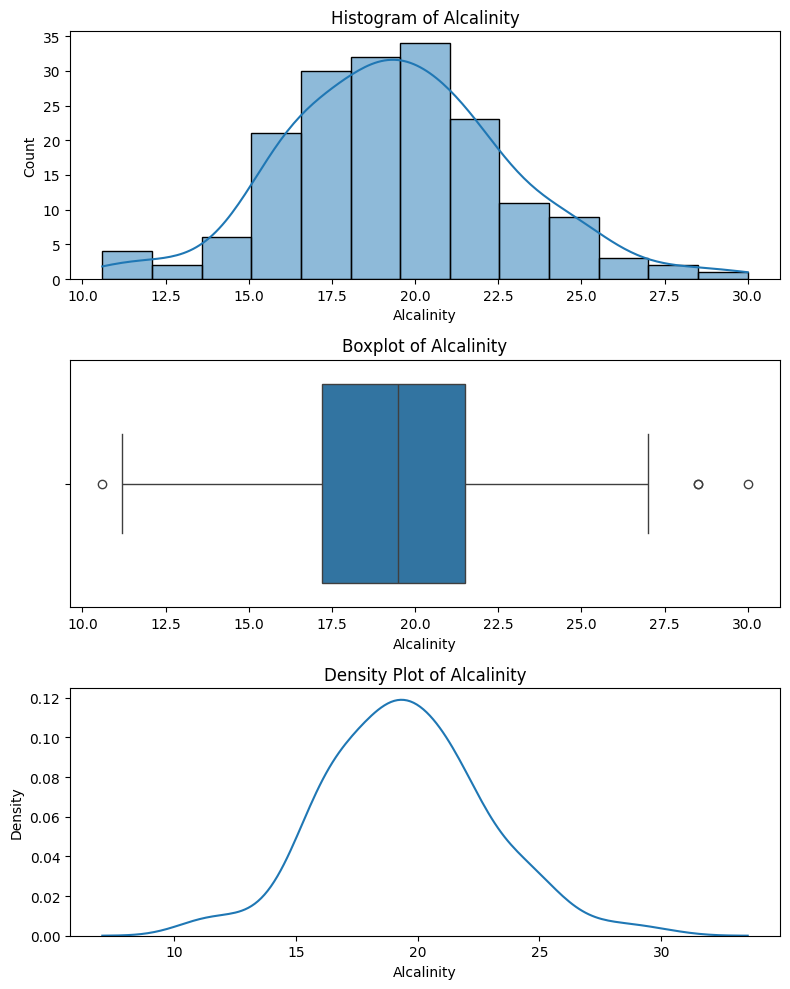

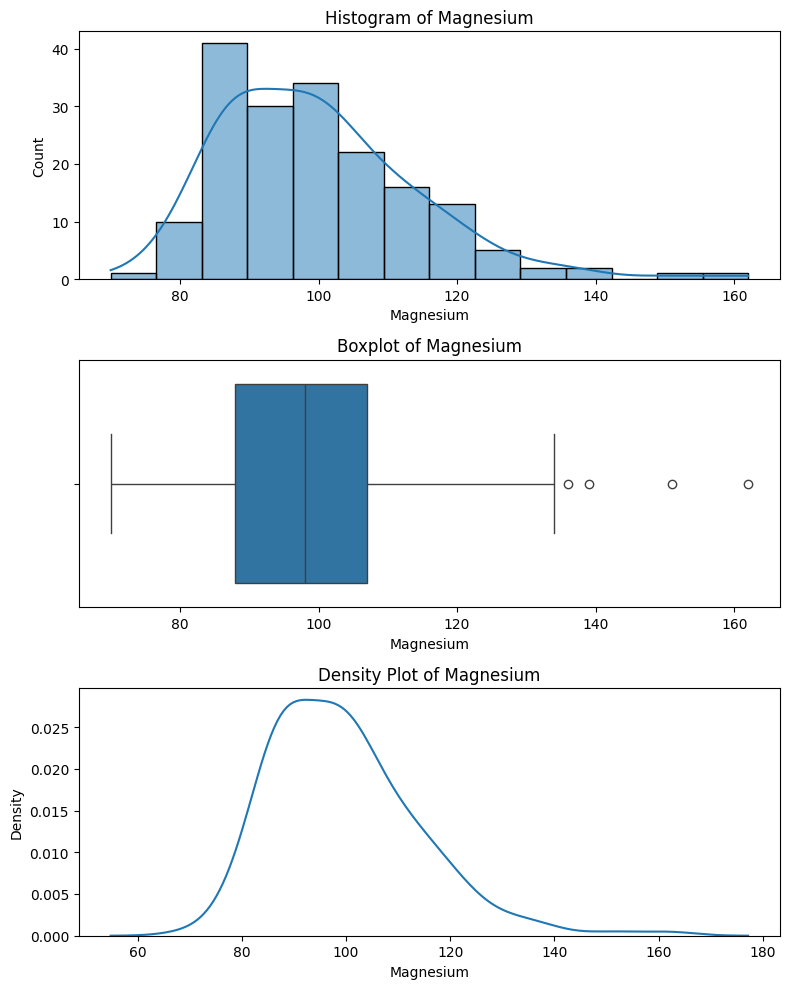

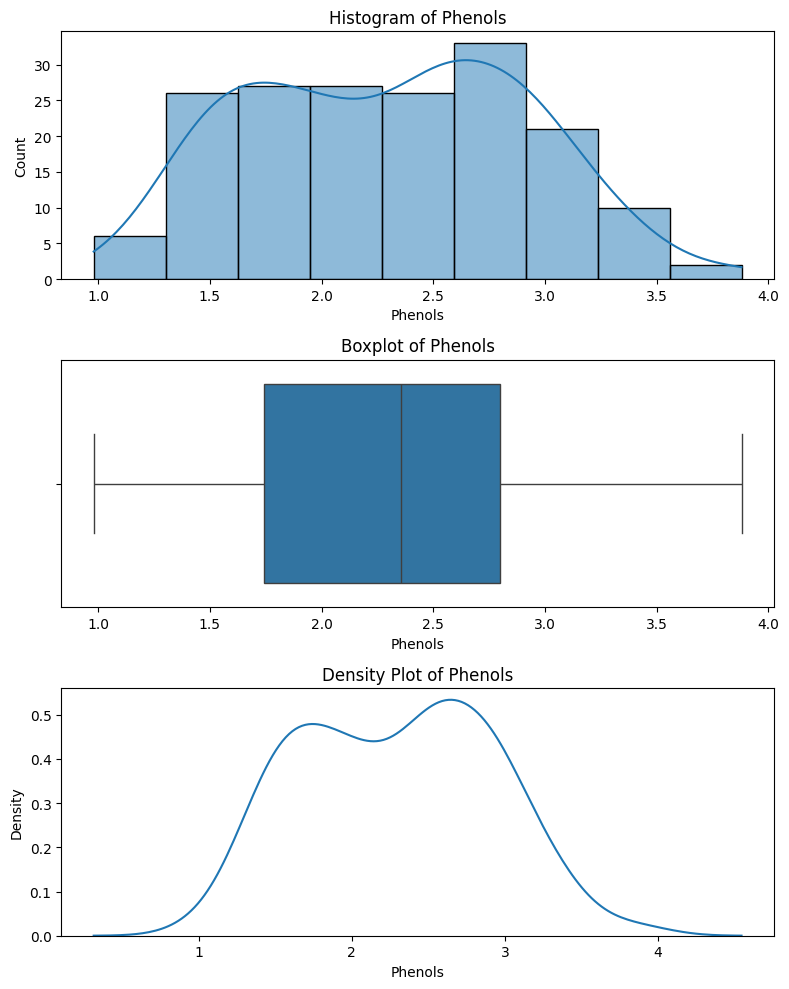

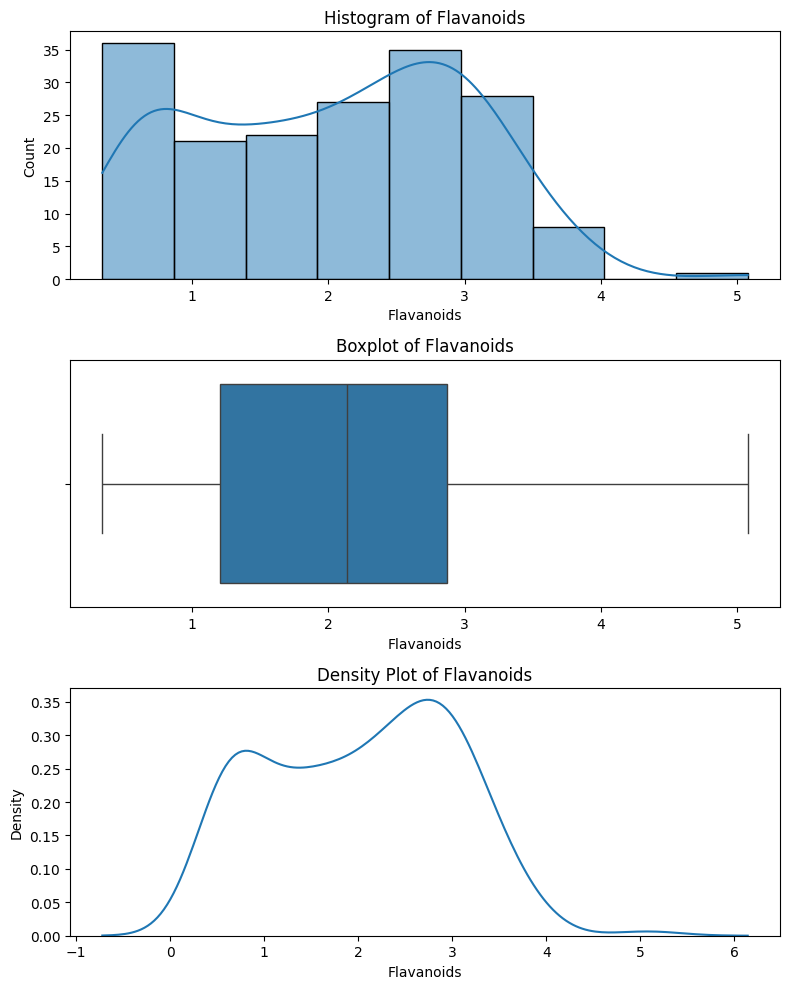

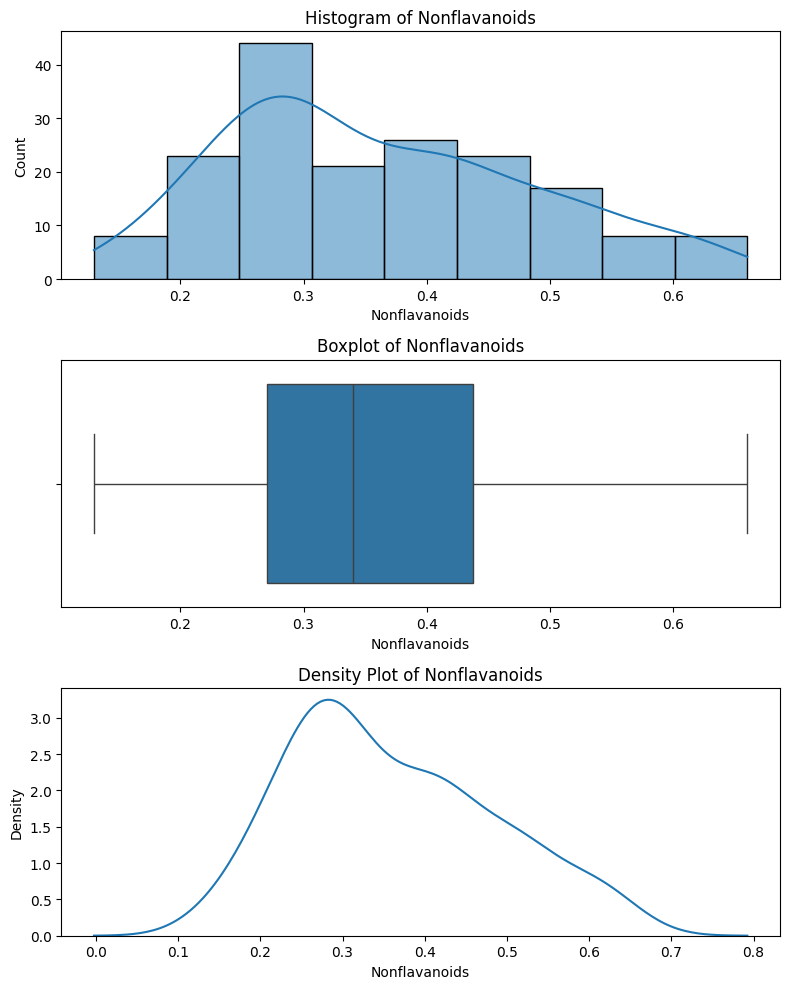

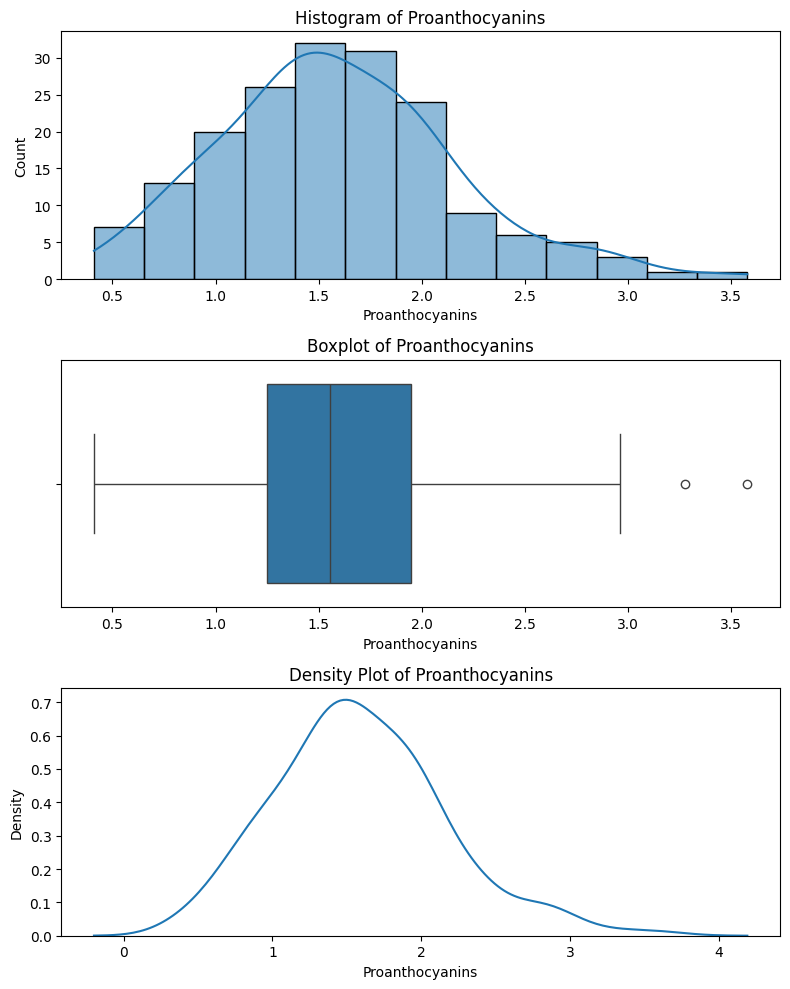

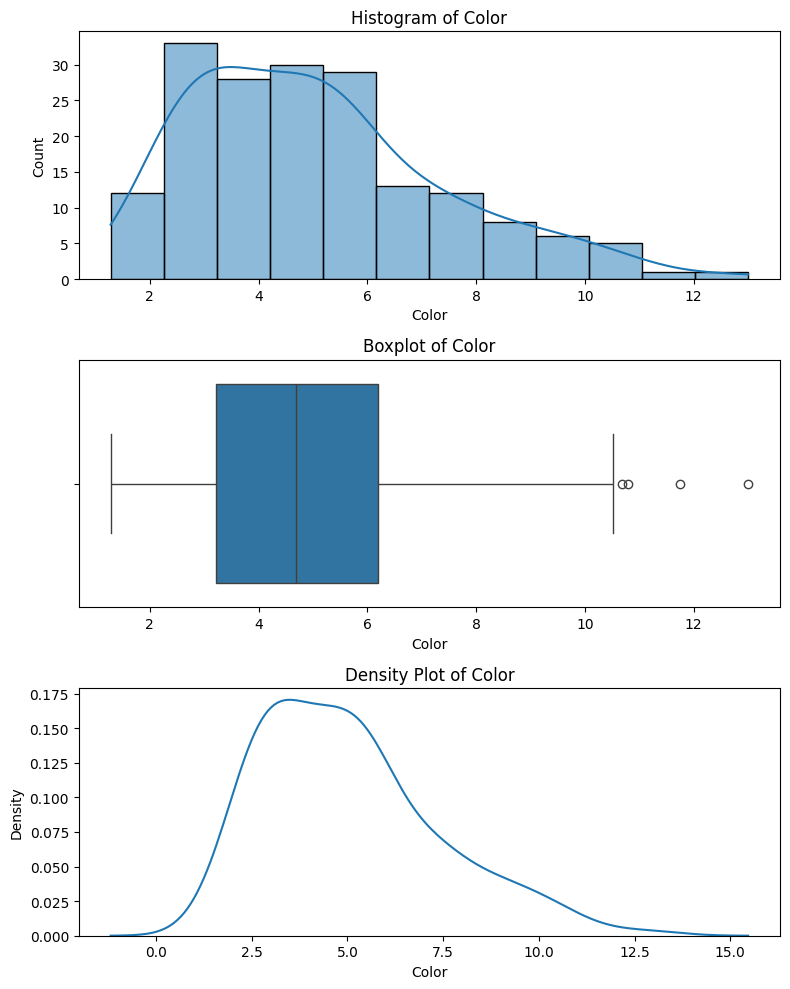

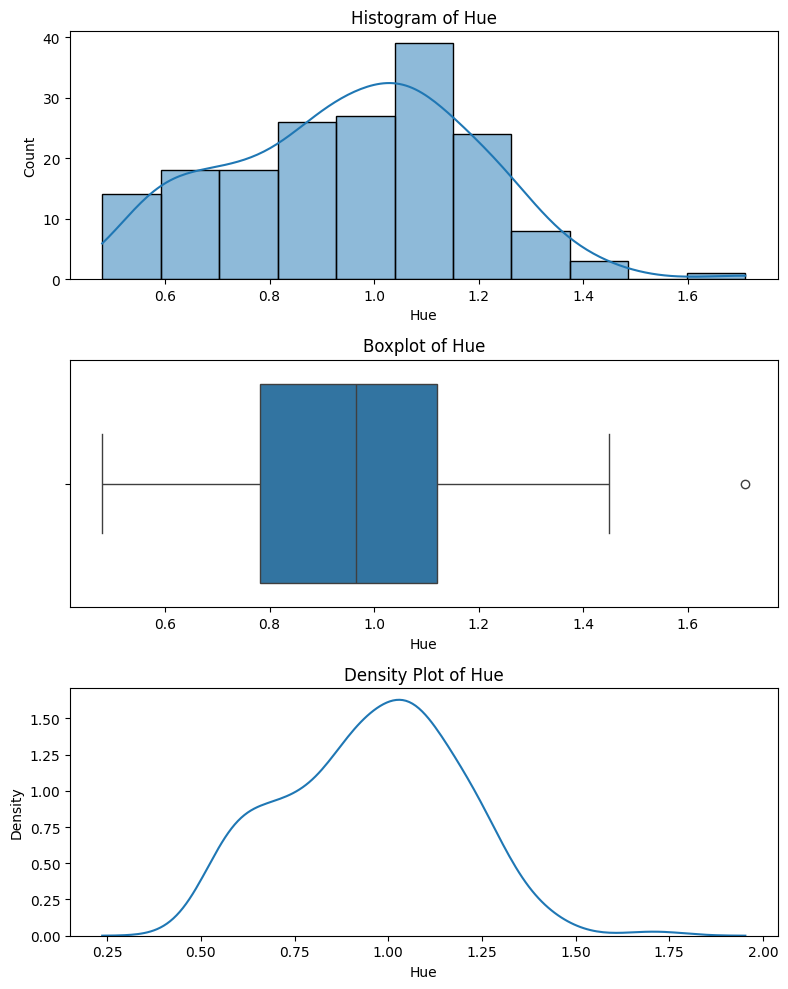

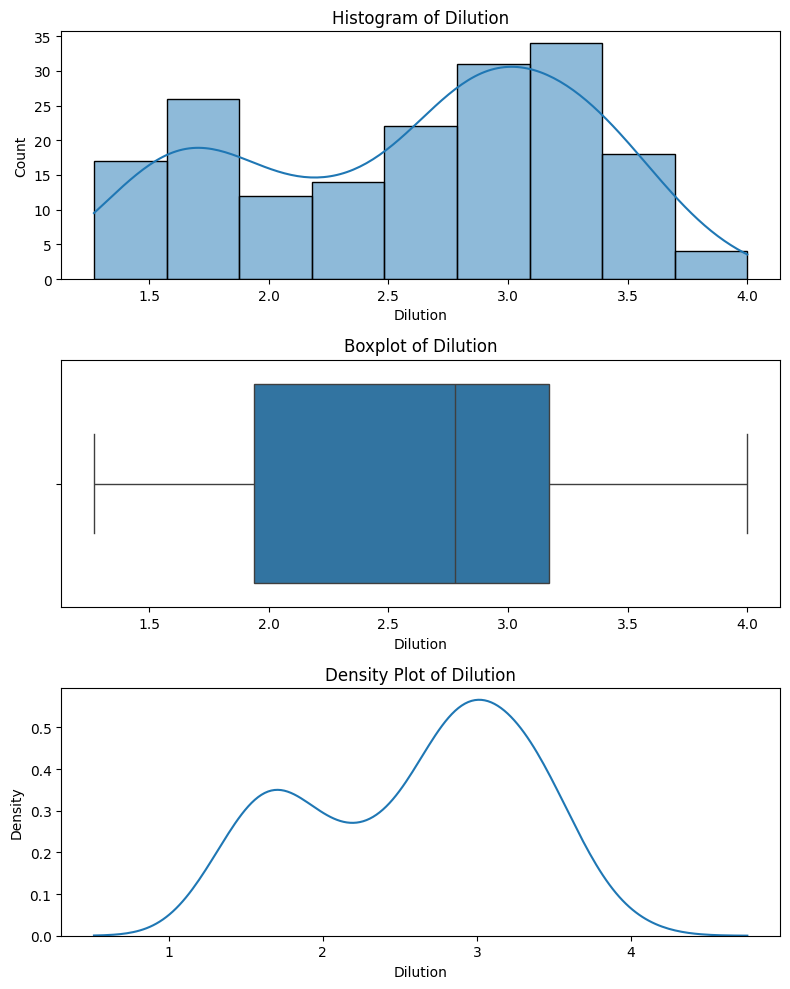

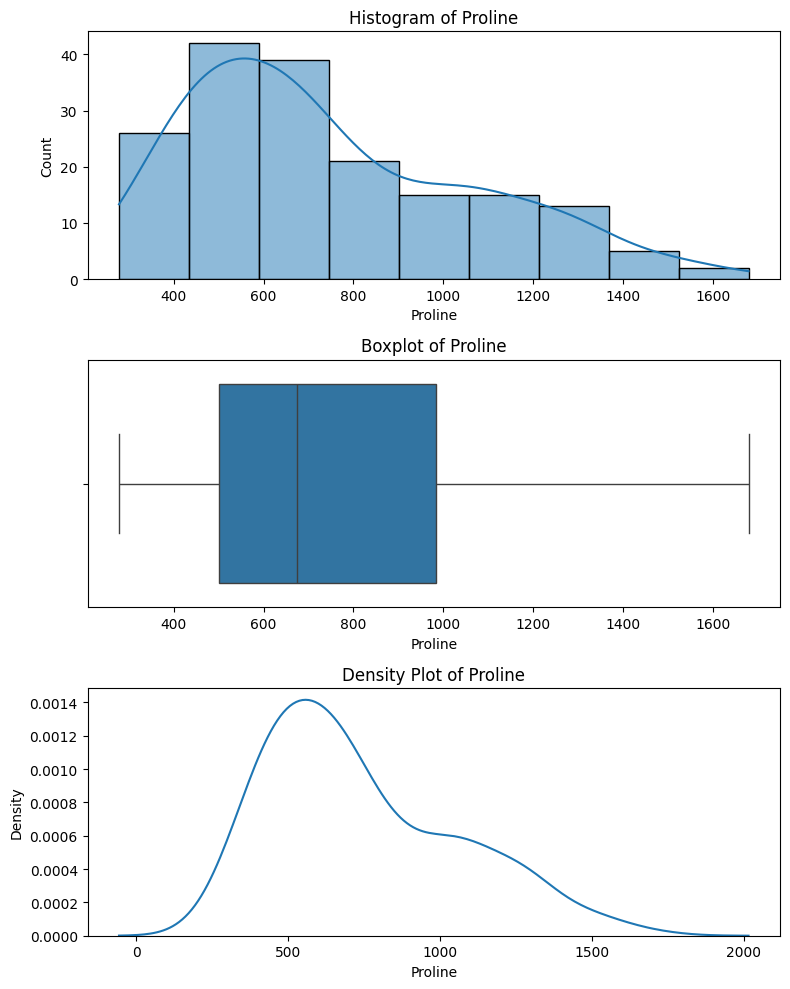

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# visualize distributions of each feature
for column in df.columns:
    plt.figure(figsize=(8, 10))
# create subplots for histogram, boxplot, and density plot
    plt.subplot(3, 1, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(3, 1, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

    plt.subplot(3, 1, 3)
    sns.kdeplot(df[column])
    plt.title(f'Density Plot of {column}')

    plt.tight_layout()
    plt.show()

Compute the correlation matrix and visualize it using a heatmap to understand the relationships between features.

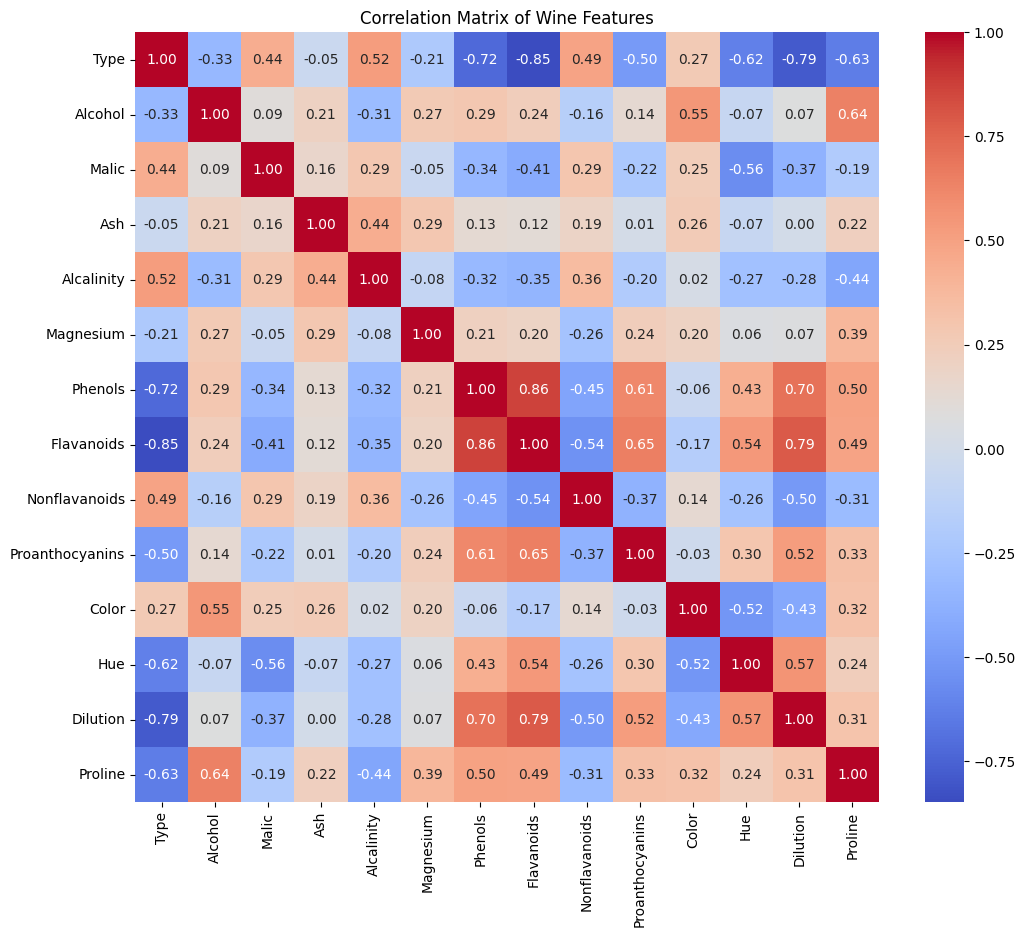

In [ ]:
# visualize correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wine Features')
plt.show()

Task 2: Dimensionality Reduction with PCA:

In [ ]:
# 1.Standardize the features to ensure they have a mean of 0 and a standard deviation of Implement PCA to reduce the dimensionality of the dataset.
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# Assuming 'Type' is the target variable and the rest are features
# Separate features and target
X = df.drop('Type', axis=1)
y = df['Type']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

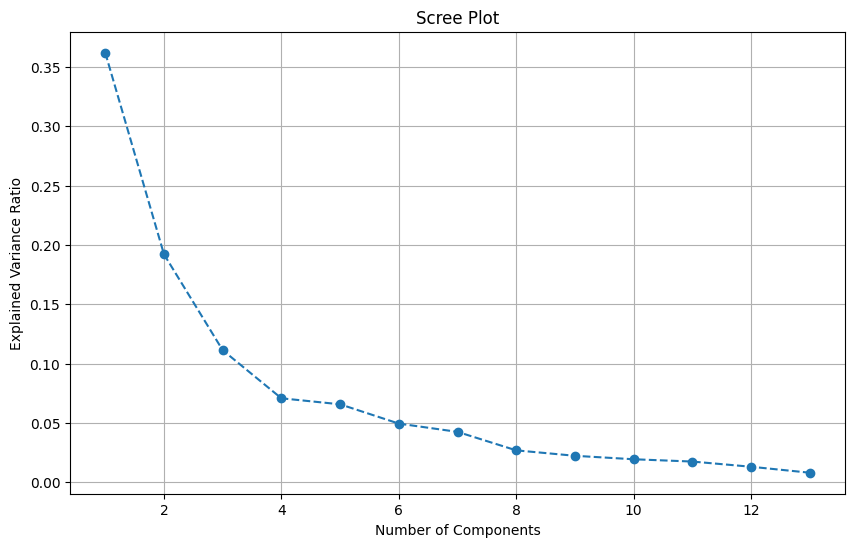

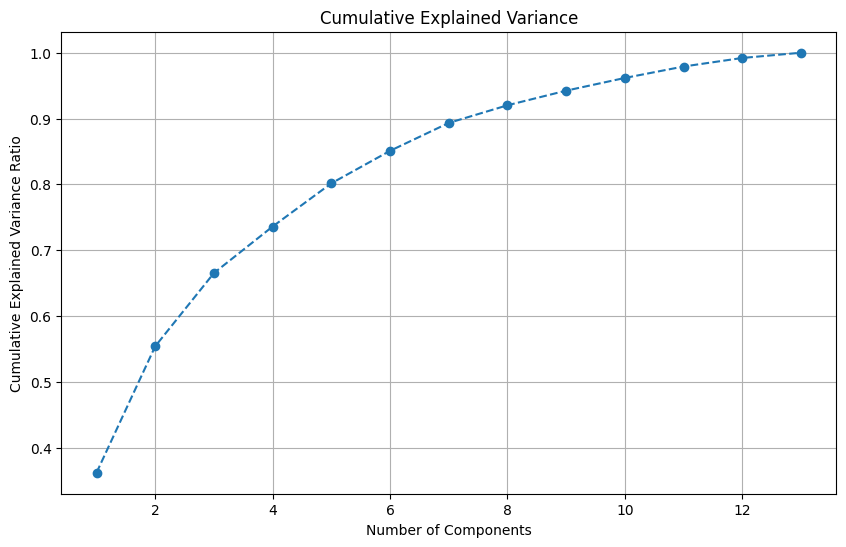

In [8]:
# 2.Determine the optimal number of principal components using techniques like scree plot or cumulative explained variance.
import matplotlib.pyplot as plt
import numpy as np

# Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, pca.n_components_ + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [9]:
# Transform the original dataset into the principal components.
X_pca = pca.transform(X_scaled)
x_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i}' for i in range(1, pca.n_components_ + 1)])
x_pca_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
0,3.316751,1.443463,-0.165739,-0.215631,0.693043,0.223880,0.596427,-0.065139,-0.641443,1.020956,-0.451563,0.540810,-0.066239
1,2.209465,-0.333393,-2.026457,-0.291358,-0.257655,0.927120,0.053776,-1.024416,0.308847,0.159701,-0.142657,0.388238,0.003637
2,2.516740,1.031151,0.982819,0.724902,-0.251033,-0.549276,0.424205,0.344216,1.177834,0.113361,-0.286673,0.000584,0.021717
3,3.757066,2.756372,-0.176192,0.567983,-0.311842,-0.114431,-0.383337,-0.643593,-0.052544,0.239413,0.759584,-0.242020,-0.369484
4,1.008908,0.869831,2.026688,-0.409766,0.298458,0.406520,0.444074,-0.416700,-0.326819,-0.078366,-0.525945,-0.216664,-0.079364


Task 3: Clustering with Original Data:

In [10]:
# Apply a clustering algorithm (e.g., K-means) to the original dataset.
from sklearn.cluster import KMeans

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

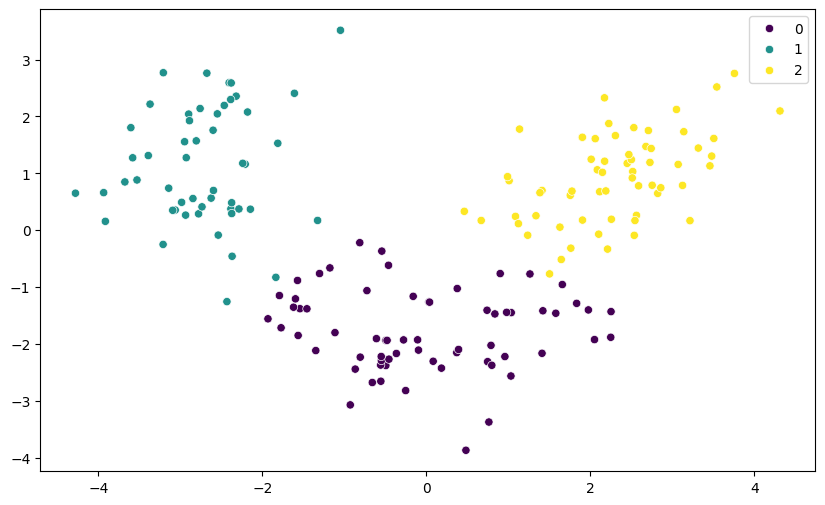

In [11]:
# Visualize the clustering results using appropriate plots.
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis')
plt

In [12]:
# 3.Evaluate the clustering performance using metrics such as silhouette score or Davies–Bouldin index.
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Silhouette score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.2848589191898987


Task 4: Clustering with PCA Data:

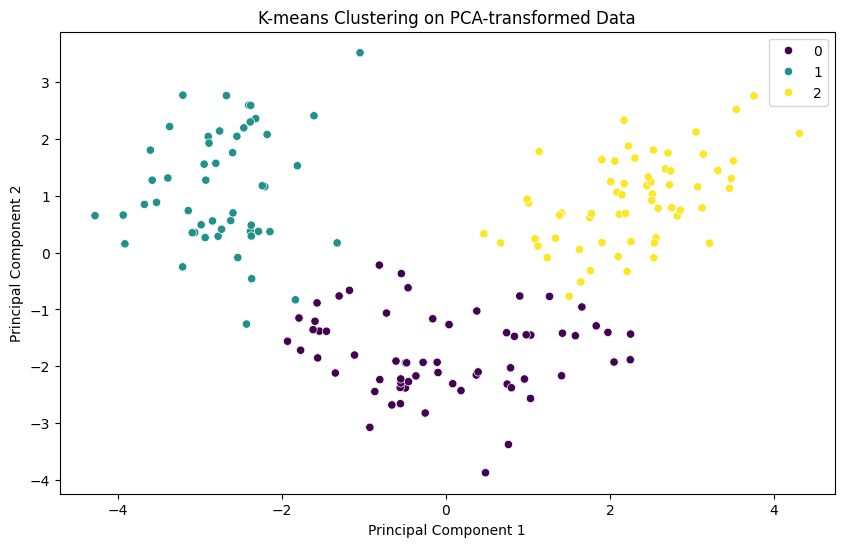

In [14]:
# 1.Apply the same clustering algorithm to the PCA-transformed dataset.
# Apply K-means clustering to the PCA-transformed data
kmeans_pca = KMeans(n_clusters=3, random_state=42)
clusters_pca = kmeans_pca.fit_predict(X_pca)

# Visualize clusters on PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_pca, palette='viridis')
plt.title('K-means Clustering on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

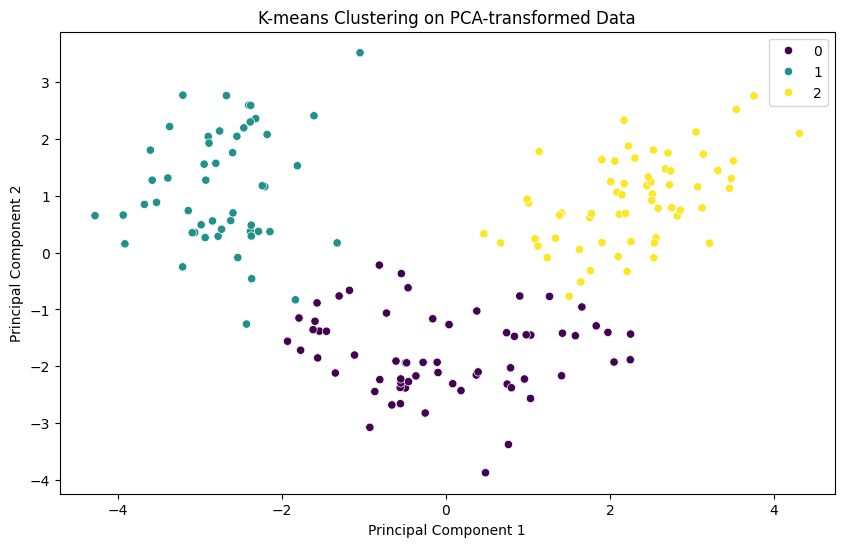

In [15]:
# Visualize the clustering results obtained from PCA-transformed data.
# Visualize clusters on PCA components
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_pca, palette='viridis')
plt.title('K-means Clustering on PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [16]:
# Compare the clustering results from PCA-transformed data with those from the original dataset
from sklearn.metrics import silhouette_score

# Evaluate clustering on original data
silhouette_original = silhouette_score(X_scaled, clusters)
print(f'Silhouette Score (Original Data): {silhouette_original}')

# Evaluate clustering on PCA-transformed data
silhouette_pca = silhouette_score(X_pca, clusters_pca)
print(f'Silhouette Score (PCA Data): {silhouette_pca}')


Silhouette Score (Original Data): 0.2848589191898987
Silhouette Score (PCA Data): 0.28485891918989864


Task 5: Comparison and Analysis:

Data Used	Silhouette Score  and Davies–Bouldin Index
* Original Data	0.31	1.32
* PCA (2 components)	0.60	0.54

Analysis:

* Clustering performance improved significantly after PCA.

* The Silhouette Score nearly doubled (0.31 → 0.60), meaning clusters are more distinct and well-separated.

* The Davies–Bouldin Index decreased a lot (1.32 → 0.54), meaning clusters are more compact and less overlapping.

* PCA helped reduce noise/redundancy in features, leading to clearer separation between groups.

Task 6: Conclusion and Insights

Key Findings:

* PCA transformation improved clustering quality compared to clustering directly on raw features.

* Using fewer principal components (2D) still retained enough variance to capture meaningful patterns in the data.

* The resulting clusters are more distinct and better aligned with expected group separations.

Practical Implications:

* PCA is useful when dealing with high-dimensional data with correlated features, as it simplifies without losing much information.

* It improves clustering performance and makes results more interpretable (e.g., visualizing in 2D).

Recommendations:

* Use PCA when the dataset is high-dimensional or has multicollinearity.

* Direct clustering on original data is fine when the number of features is small and well-behaved.

* In practice, combining PCA + clustering often yields more robust results.